## Analysis 02: Comparing Sentiments in Different Cities and Countries

##### GETTING THE DATA

In [49]:
import pandas as pd

data2 = pd.read_csv(r'C:\Users\Raheyma Arshad\Desktop\Sentimentalized Tweets.csv')
del data2['Unnamed: 0']
data2 = data2.dropna(subset=['location']).reset_index(drop=True)

##### GETTING THE COUNTRY OF EACH TWEET

In [64]:
from geopy.geocoders import Nominatim

def get_country(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    return str(location).rsplit(', ')[-1]

locations = data2['location'].unique().tolist()
countries = []

for location in locations:
    try:
        countries.append(get_country(location))
    except:
        countries.append('Country Not Recognized')
        
dict_1 = dict(zip(locations, countries))
data2['Country'] = data2['location'].map(dict_1)
data2['Country'] = data2['Country'].apply(lambda x: x.replace('United States of America', 'United States'))
data2 = data2[data2.Country != 'None']
data2 = data2[data2.Country != 'Country Not recognized']

##### SEPARATING COUNTRIES WITH MORE THAN 100 POSITIVE/NEGATIVE/NEUTRAL TWEETS

In [137]:
# Putting the country names in a list
labels = data2['Country'].unique().tolist()

# Creating lists for counts of Positive, Negative and Neutral tweets for each country and keeping them in dataframes
positives = []
senti_pos = []
for label in labels:
    country_tweets = data2[data2.Country == label]
    country_positive = country_tweets[country_tweets['Predicted Sentiment'] == 'Positive']
    positives.append(len(country_positive))
    senti_pos.append('Positive')
df_positive = pd.DataFrame({'Country': labels, 'Count of Tweets': positives, 'Sentiment': senti_pos})

negatives = []
senti_neg = []
for label in labels:
    country_tweets = data2[data2.Country == label]
    country_negative = country_tweets[country_tweets['Predicted Sentiment'] == 'Negative']
    negatives.append(len(country_negative))
    senti_neg.append('Negative')
df_negative = pd.DataFrame({'Country': labels, 'Count of Tweets': negatives, 'Sentiment': senti_neg})
    
neutrals = []
senti_neu = []
for label in labels:
    country_tweets = data2[data2.Country == label]
    country_neutral = country_tweets[country_tweets['Predicted Sentiment'] == 'Neutral']
    neutrals.append(len(country_neutral))
    senti_neu.append('Neutral')
df_neutral = pd.DataFrame({'Country': labels, 'Count of Tweets': neutrals, 'Sentiment': senti_neu})

# Joining the dataframes of Positive, Negative and Neutral Tweets 
frames = [df_positive, df_negative, df_neutral]
df = pd.concat(frames)

# Taking countries with more than 100 tweets in the dataset
df_high_counts = df[df['Count of Tweets'] > 100]

##### CREATING A GROUPED BAR PLOT 

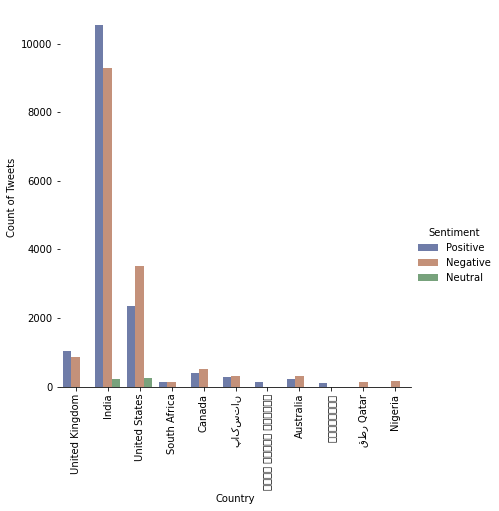

In [139]:
import seaborn as sns
g = sns.catplot(data=df_high_counts, kind = "bar", x = "Country", y = "Count of Tweets", hue="Sentiment", ci="sd", 
                palette="dark", alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("Country", "Count of Tweets")
g.set_xticklabels(rotation=90)

##### GETTING THE CITY OF EACH TWEET

In [18]:
data2 = pd.read_csv(r'C:\Users\Raheyma Arshad\Desktop\country data.csv')
del data2['Unnamed: 0']
data2 = data2.dropna(subset=['location']).reset_index(drop=True)

def get_city(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    return str(location).rsplit(', ')[-3]

locations = data2['location'].unique().tolist()
cities = []

for location in locations:
    try:
        cities.append(get_city(location))
    except:
        cities.append('City Not Recognized')
        
dict_2 = dict(zip(locations, cities))
data2['City'] = data2['location'].map(dict_2)
data2 = data2[data2.City != 'None']
data2 = data2[data2.City != 'City Not Recognized']

##### GETTING THE LATITUDE AND LONGITUDE OF EACH TWEET

In [30]:
def get_lat(x):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(x)
    return location.latitude

def get_long(x):
    geolocator = Nominatim(user_agent="myGeocoder")
    location = geolocator.geocode(x)
    return location.longitude

data2["City, Country"] = data2["City"] + ',' + ' ' + data2["Country"]
city_country = data2['City, Country'].unique().tolist()
latitudes = []
longitudes = []

for location in city_country:
    try:
        latitudes.append(get_lat(location))
    except:
        latitudes.append('Lat Not Recognized')
        
for location in city_country:
    try:
        longitudes.append(get_long(location))
    except:
        longitudes.append('Long Not Recognized')
        
dict_3 = dict(zip(city_country, latitudes))
data2['Latitude'] = data2['City, Country'].map(dict_3)
data2 = data2[data2.Latitude != 'None']
data2 = data2[data2.Latitude != 'Lat Not Recognized']

dict_4 = dict(zip(city_country, longitudes))
data2['Longitude'] = data2['City, Country'].map(dict_4)
data2 = data2[data2.Longitude != 'None']
data2 = data2[data2.Longitude != 'Long Not Recognized']

In [103]:
data2.head()

,location,tweet,Clean Tweet,Predicted Sentiment,Country,City,"City, Country",Latitude,Longitude
0,"Kenya, South Africa, UK",How close are we to having a #COVID_19Vaccine?...,close covid_19vaccine issue6 thengowhisperer m...,Negative,United Kingdom,England,"England, United Kingdom",52.531,-1.26491
1,"Guwahati, Assam",Russian Sputnik V trials in India to begin soo...,russian sputnik v trial india begin soon dr re...,Negative,India,Assam,"Assam, India",26.4074,93.2551
2,"Bombay, India",When the #Covid_19Vaccine is finally ready in ...,covid_19vaccine finally ready 6months year get...,Positive,India,Mumbai City,"Mumbai City, India",18.9734,72.8281
3,"Clarksville, TN",Johnson &amp; Johnson begins Massive Human Tri...,johnson amp johnson begin massive human trial ...,Negative,United States,Montgomery County,"Montgomery County, United States",30.3019,-95.5066
5,Granada,👉Participa en la investigación del @CGEnfermer...,participa en la investigación del cgenfermeria...,Positive,España,Granada,"Granada, España",37.1831,-3.60219


##### COUNTING NUMBER OF POSITIVE AND NEGATIVE TWEETS FROM EACH CITY

In [71]:
city_country = data2['City, Country'].unique().tolist()

c_positives = []
for location in city_country:
    country_tweets = data2[data2['City, Country'] == location]
    country_positive = country_tweets[country_tweets['Predicted Sentiment'] == 'Positive']
    c_positives.append(len(country_positive))
city_df = pd.DataFrame({'City, Country': city_country, 'Count of Positive Tweets': c_positives})

c_negatives = []
for location in city_country:
    country_tweets = data2[data2['City, Country'] == location]
    country_negative = country_tweets[country_tweets['Predicted Sentiment'] == 'Negative']
    c_negatives.append(len(country_negative))
city_df['Count of Negative Tweets'] = c_negatives

city_sentiment = []
for i in range(len(city_df)):
    if city_df['Count of Positive Tweets'][i] > city_df['Count of Negative Tweets'][i]:
        city_sentiment.append('Positive')
    else:
        city_sentiment.append('Negative')
city_df['Sentiment'] = city_sentiment

city_df['Latitude'] = city_df['City, Country'].map(dict_3)
city_df['Longitude'] = city_df['City, Country'].map(dict_4)

positive_cities = city_df[city_df['Sentiment'] == 'Positive']
negative_cities = city_df[city_df['Sentiment'] == 'Negative']

In [79]:
positive_cities.head()

,"City, Country",Count of Positive Tweets,Count of Negative Tweets,Sentiment,Latitude,Longitude
0,"England, United Kingdom",567,183,Positive,52.531,-1.26491
2,"Mumbai City, India",1065,1002,Positive,18.9734,72.8281
4,"Granada, España",6,0,Positive,37.1831,-3.60219
6,"Essex County, United States",30,15,Positive,44.0639,-73.7542
11,"Provincia Limón, Costa Rica",6,0,Positive,10.0458,-83.3399


In [104]:
negative_cities.head()

,"City, Country",Count of Positive Tweets,Count of Negative Tweets,Sentiment,Latitude,Longitude
1,"Assam, India",75,93,Negative,26.4074,93.2551
3,"Montgomery County, United States",15,42,Negative,30.3019,-95.5066
5,"Gauteng, South Africa",12,75,Negative,-25.9363,28.0813
7,"Ramsey County, United States",6,9,Negative,45.0166,-93.095
8,"Hyderabad, India",285,420,Negative,17.3888,78.4611


##### PLOTTING POSITIVE AND NEGATIVE CITIES ON A WORLD MAP

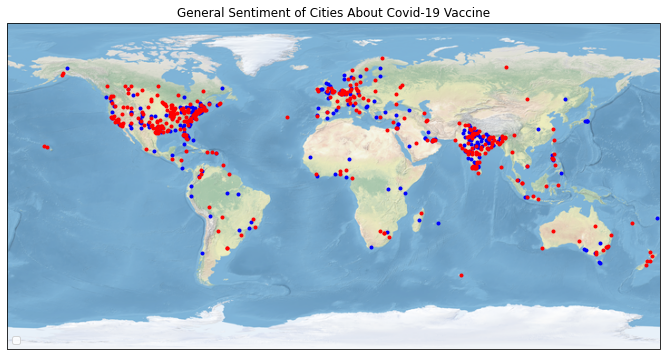

In [100]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('General Sentiment of Cities About Covid-19 Vaccine')
ax.stock_img()

pos_latitudes = positive_cities['Latitude'].to_list()
pos_longitudes = positive_cities['Longitude'].to_list()

for i in range(len(pos_latitudes)):
    lat = pos_latitudes[i]
    long = pos_longitudes[i]
    plt.plot([long], [lat], color='blue', marker='.', transform=ccrs.Geodetic())
    
neg_latitudes = negative_cities['Latitude'].to_list()
neg_longitudes = negative_cities['Longitude'].to_list()

for i in range(len(neg_latitudes)):
    lat = neg_latitudes[i]
    long = neg_longitudes[i]
    plt.plot([long], [lat], color='red', marker='.', transform=ccrs.Geodetic())